In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv("advertising.csv")
df.sample(3)

,TV,Radio,Newspaper,Sales
37,74.7,49.4,45.7,14.7
89,109.8,47.8,51.4,16.7
115,75.1,35.0,52.7,12.6


In [9]:
def scatterplt(col): 
    plt.scatter(df[col],df['Sales'])
    

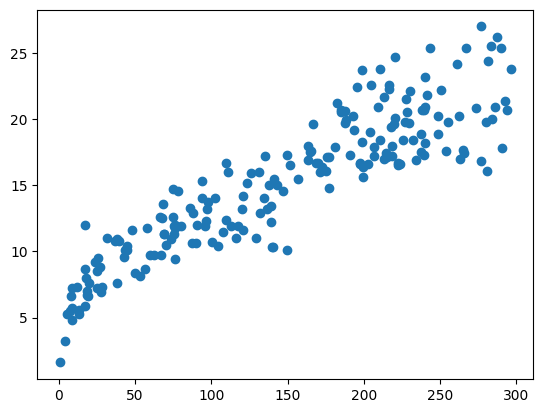

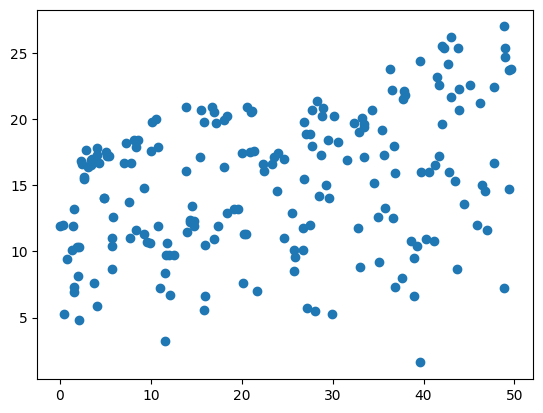

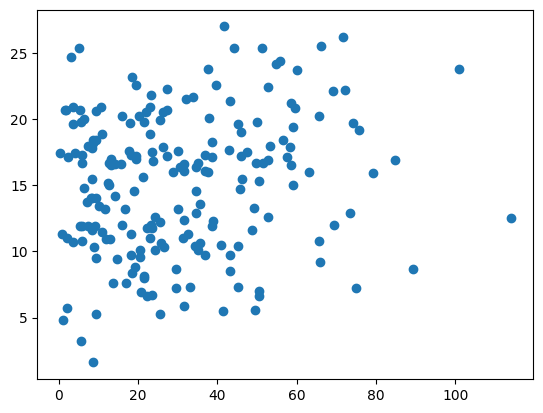

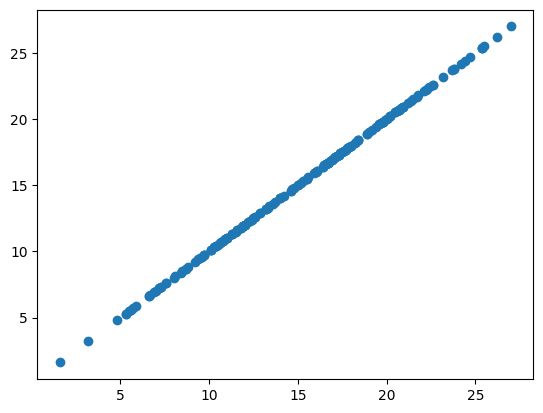

In [24]:
m=1
for i in df.columns: 
    scatterplt(i)
    m+=1
plt.show()    

In [25]:
df.shape

(200, 4)

In [26]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

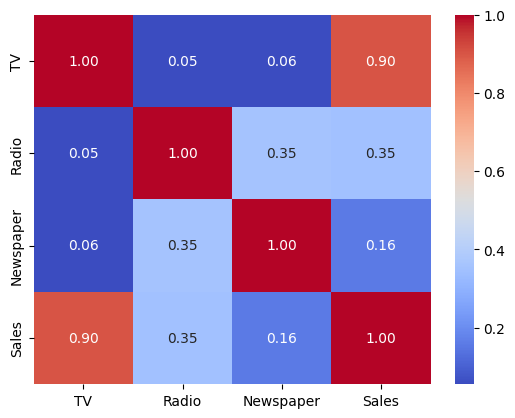

In [29]:
sns.heatmap(df.corr(),cmap='coolwarm', fmt=".2f",annot=True)

C:\Users\raj\AppData\Local\Temp\ipykernel_5852\2540696852.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Newspaper'],df['Sales'],5,cmap='coolwarm')


Text(0.5, 0.5, 'sales')

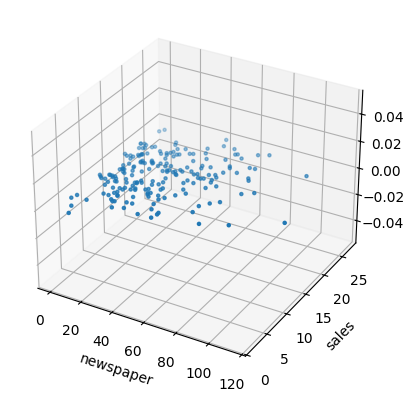

In [38]:
plt.subplot(projection='3d')
plt.scatter(df['Newspaper'],df['Sales'],5,cmap='coolwarm')
plt.xlabel("newspaper")
plt.ylabel('sales')

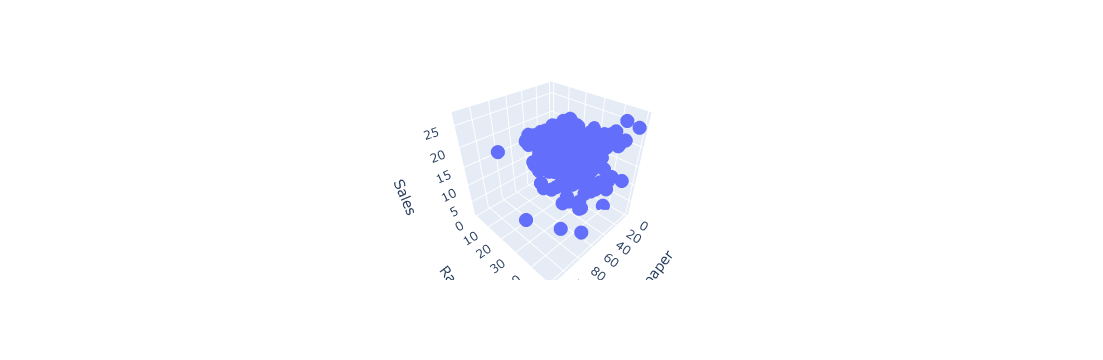

In [49]:
import plotly.express as px 
import plotly.graph_objects as go
px.scatter_3d(df,x=df['Newspaper'],y=df['Radio'],z=df['Sales'])
# fig.add_trace(go.Surface(x=x,y=y,))
# x_grid, y_grid = np.meshgrid(x_range, y_range)
# z_grid = lr.intercept_ + lr.coef_[0] * x_grid + lr.coef_[1] * y_grid  # Plane equation

# # Add regression line
# fig.add_trace(
#     go.Surface(
#         x=x_grid,
#         y=y_grid,
#         z=z_grid,
#         colorscale="viridis",
#         opacity=0.7,
#         name="Regression Hyperplane"
#     )
# )

In [40]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [42]:
from tensorflow  import keras 
from keras.models import Sequential 
from keras.layers import Dense 


In [43]:
X=df.iloc[:,[0,1]]
y=df['Sales'].values

In [44]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [51]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=2))
model.add(Dense(13,activation="relu"))
model.add(Dense(1,activation='relu'))

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │             143 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187 (748.00 B)

 Trainable params: 187 (748.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.0000e+00 - loss: 250.2766 - val_accuracy: 0.0000e+00 - val_loss: 199.7382
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 252.0905 - val_accuracy: 0.0000e+00 - val_loss: 198.4199
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 248.0804 - val_accuracy: 0.0000e+00 - val_loss: 196.4872
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 246.0024 - val_accuracy: 0.0000e+00 - val_loss: 196.4872
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 245.3477 - val_accuracy: 0.0000e+00 - val_loss: 196.4872
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 244.0006 - val_accuracy: 0.0000e+00 - val_loss: 196.4872
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 243.4533 - val_accuracy: 0.0000e+00 - val_loss: 196.4872
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2